<a href="https://colab.research.google.com/github/wushidiguo/keras-notes/blob/master/RNN_for_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size =32

print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
# SimpleRNN默认输出最后一个timestep的output (32,)。要输出timestep的累计结果，可以设置return_sequences=True。对于多个RNN叠加的情况，必须使用累计结果。
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 46s 2ms/step - loss: 0.5541 - acc: 0.7170 - val_loss: 0.4379 - val_acc: 0.8108
Epoch 2/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3722 - acc: 0.8488 - val_loss: 0.4320 - val_acc: 0.8272
Epoch 3/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2869 - acc: 0.8860 - val_loss: 0.3851 - val_acc: 0.8286
Epoch 4/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2450 - acc: 0.9046 - val_loss: 0.4441 - val_acc: 0.8364
Epoch 5/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2054 - acc: 0.9237 - val_loss: 0.3733 - val_acc: 0.8484
Epoch 6/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1505 - acc: 0.9474 - val_loss: 0.4511 - val_acc: 0.8048
Epoch 7/10
20000/20000

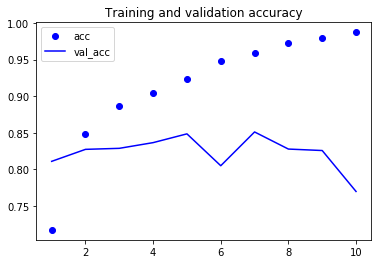

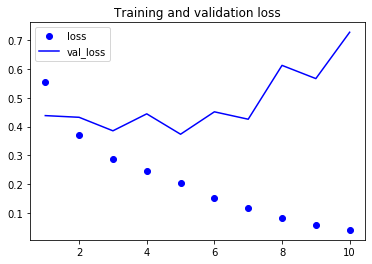

In [6]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="acc")
plt.plot(epochs, val_acc, "b", label="val_acc")
plt.legend()
plt.title("Training and validation accuracy")

plt.figure()
plt.plot(epochs, loss, "bo", label="loss")
plt.plot(epochs, val_loss, "b", label="val_loss")
plt.legend()
plt.title("Training and validation loss")

plt.show()

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 144s 7ms/step - loss: 0.5757 - acc: 0.7242 - val_loss: 0.4084 - val_acc: 0.8282
Epoch 2/10
20000/20000 [==============================] - 138s 7ms/step - loss: 0.3169 - acc: 0.8722 - val_loss: 0.3268 - val_acc: 0.8628
Epoch 3/10
20000/20000 [==============================] - 138s 7ms/step - loss: 0.2464 - acc: 0.9053 - val_loss: 0.2939 - val_acc: 0.8888
Epoch 4/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.2073 - acc: 0.9229 - val_loss: 0.6222 - val_acc: 0.8018
Epoch 5/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1830 - acc: 0.9326 - val_loss: 0.3369 - val_acc: 0.8868
Epoch 6/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1649 - acc: 0.9412 - val_loss: 0.3075 - val_acc: 0.8760
Epoch 7/10
20000

In [0]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="acc")
plt.plot(epochs, val_acc, "b", label="val_acc")
plt.legend()
plt.title("Training and validation accuracy")

plt.figure()
plt.plot(epochs, loss, "bo", label="loss")
plt.plot(epochs, val_loss, "b", label="val_loss")
plt.legend()
plt.title("Training and validation loss")

plt.show()